# Load data

In [34]:
import pandas as pd
#read the data
df = pd.read_csv('spam_ham_dataset.csv')
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [35]:
#download package
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/amitmistriel/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

# Tokenize and transform data

In [36]:
import string
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
#manipulate the data
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    #for each word in text
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))


    return " ".join(y)

In [37]:
#add column of transformed text
df['transformed_text'] = df['text'].apply(transform_text)
df.head()

,Unnamed: 0,label,text,label_num,transformed_text
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,subject enron methanol meter 988291 follow not...
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,subject hpl nom januari 9 2001 see attach file...
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,subject neon retreat ho ho ho around wonder ti...
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1,subject photoshop window offic cheap main tren...
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0,subject indian spring deal book teco pvr reven...


# EDA - tokenize for each category

In [38]:
nltk.download('punkt')
# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/amitmistriel/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,Unnamed: 0,label,text,label_num,transformed_text,num_words
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,subject enron methanol meter 988291 follow not...,68
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,subject hpl nom januari 9 2001 see attach file...,24
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,subject neon retreat ho ho ho around wonder ti...,551
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1,subject photoshop window offic cheap main tren...,49
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0,subject indian spring deal book teco pvr reven...,71


<AxesSubplot: xlabel='num_words', ylabel='Count'>

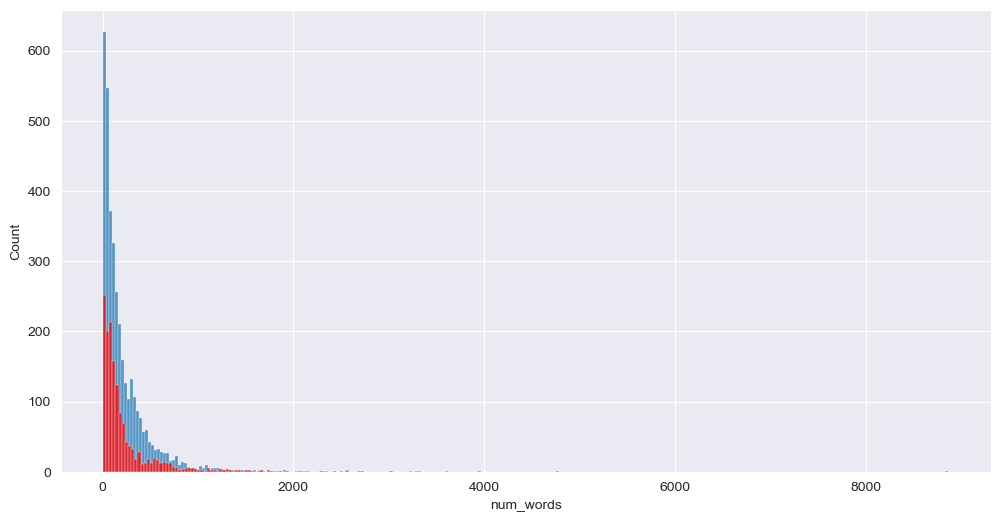

In [39]:
#plot for each category
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
#frequency of tokenize for each category
sns.histplot(df[df['label_num'] == 0]['num_words']) #ham
sns.histplot(df[df['label_num'] == 1]['num_words'],color='red') #spam

# Transform text to features

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(df['transformed_text']).toarray()
y = df['label_num'].values

In [41]:
#split data to test and train
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

# Model evaluation

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,recall_score,precision_score, f1_score
from tabulate import tabulate

#model and measures
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    return accuracy,precision,f1,recall

#model1 - LogisticRegression
lrc = LogisticRegression(solver='liblinear', penalty='l1')
lrcMeasures=train_classifier(lrc,X_train,y_train,X_test,y_test)
d = {"Logistic Regression":lrcMeasures}
headers = ['Model', 'Accuracy', 'Precision', 'F1', 'Recall']
print(tabulate([(k,) + v for k,v in d.items()], headers = headers))

Model                  Accuracy    Precision        F1    Recall
-------------------  ----------  -----------  --------  --------
Logistic Regression    0.969082      0.92691  0.962071  0.967954


In [50]:
#model2 - RandomForest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
rfcMeasures=train_classifier(rfc,X_train,y_train,X_test,y_test)
d = {"Random Forest":rfcMeasures}
headers = ['Model', 'Accuracy', 'Precision', 'F1', 'Recall']
print(tabulate([(k,) + v for k,v in d.items()], headers = headers))

Model            Accuracy    Precision        F1    Recall
-------------  ----------  -----------  --------  --------
Random Forest    0.978744     0.955631  0.973707  0.975716


In [51]:
#model3 - KNeighbors
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier()
kncMeasures=train_classifier(knc,X_train,y_train,X_test,y_test)
d = {"KNeighbors":kncMeasures}
headers = ['Model', 'Accuracy', 'Precision', 'F1', 'Recall']
print(tabulate([(k,) + v for k,v in d.items()], headers = headers))

Model         Accuracy    Precision       F1    Recall
----------  ----------  -----------  -------  --------
KNeighbors    0.973913     0.967857  0.96728  0.962826


In [52]:
#model4 - SVC
from sklearn.svm import SVC
svc = SVC(kernel='sigmoid', gamma=1.0)
svcMeasures=train_classifier(svc,X_train,y_train,X_test,y_test)
d = {"SVC":svcMeasures}
headers = ['Model', 'Accuracy', 'Precision', 'F1', 'Recall']
print(tabulate([(k,) + v for k,v in d.items()], headers = headers))

Model      Accuracy    Precision        F1    Recall
-------  ----------  -----------  --------  --------
SVC        0.982609     0.953177  0.978621  0.983696


In [46]:
#table of all Measures
d = {"Logistic Regression":lrcMeasures, "Random Forest":rfcMeasures,"KNeighbors":kncMeasures,"SVC":svcMeasures}
headers = ['Model', 'Accuracy', 'Precision', 'F1', 'Recall']
print(tabulate([(k,) + v for k,v in d.items()], headers = headers))

Model                  Accuracy    Precision        F1    Recall
-------------------  ----------  -----------  --------  --------
Logistic Regression    0.969082     0.92691   0.962071  0.967954
Random Forest          0.978744     0.955631  0.973707  0.975716
KNeighbors             0.973913     0.967857  0.96728   0.962826
SVC                    0.982609     0.953177  0.978621  0.983696


# Explanation

The model that gave the best accuracy is SVC. We think this run is the most accurate because this model allows better performance for binary classification with a limited number of samples (in thousands) than the other models. Therefore, the model is well suited for text classification problems, where needs to have access to a dataset of at most a few thousand labeled examples.
SVMs are different from other classification algorithms because of the way they choose the decision boundary that maximizes the distance from the nearest data points of all the classes. This model is highly preferred by many as it produces significant accuracy with less computation power.
Compared to the other models: Random Forest is intrinsically suited for multiclass problems, while SVC is intrinsically two-class, SVC is usually does a better job as it is a large margin classifier than logistic regression, SVC is less computationally demanding than kNN and is easier to interpret in binary classification.